In [5]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the dataset file in Google Drive
file_path = '/content/data.csv'

# Reading the dataset file using pandas
data = pd.read_csv(file_path)

# Displaying summary
summary = data.describe()
print("Summary:")
print(summary)

# Displaying header
header = data.head()
print("\nHeader:")
print(header)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Summary:
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000

Header:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                 

#**Data Cleaning, preprocessing and transformation**

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Format and clean the data
# Assuming the column names have whitespace, remove leading/trailing spaces
data.columns = data.columns.str.strip()

# Remove rows with null values
data = data.dropna()

# Remove outliers using z-score
z_scores = np.abs((data['Salary'] - data['Salary'].mean()) / data['Salary'].std())
data = data[z_scores < 3]

# Sample a subset of the data
sample_size = 100
data_sample = data.sample(n=sample_size, random_state=42)

# Label encode the education level
label_encoder = LabelEncoder()
data_sample['Education Level'] = label_encoder.fit_transform(data_sample['Education Level'])

# Scale the numerical columns using Min-Max scaling
numeric_columns = ['Age', 'Years of Experience']
scaler = MinMaxScaler()
data_sample[numeric_columns] = scaler.fit_transform(data_sample[numeric_columns])

# Aggregate the data by job title and calculate average salary
data_aggregated = data_sample.groupby('Job Title')['Salary'].mean()
data_aggregated = data_aggregated.reset_index()

# Merge aggregated data back into the sample data and rename columns
data_sample = pd.merge(data_sample, data_aggregated, on='Job Title', how='left')
data_sample.rename(columns={'Salary_x': 'original_salary', 'Salary_y': 'average_salary'}, inplace=True)

# Display the updated data
print("Updated Data:")
print(data_sample.head())


Updated Data:
        Age  Gender  Education Level                 Job Title  \
0  0.518519    Male                0  Senior Financial Analyst   
1  0.740741    Male                2            Senior Manager   
2  0.666667    Male                0        Operations Manager   
3  0.148148  Female                0     Junior HR Coordinator   
4  0.148148  Female                0      Social Media Manager   

   Years of Experience  original_salary  average_salary  
0             0.458333         130000.0   108333.333333  
1             0.791667         170000.0   170000.000000  
2             0.625000         125000.0   142500.000000  
3             0.041667          40000.0    40000.000000  
4             0.125000          55000.0    55000.000000  


#**Data Summarization and visualization**

Summary Statistics:
              Age  Years of Experience  original_salary  average_salary
count  100.000000           100.000000       100.000000      100.000000
mean     0.398148             0.351667     96000.000000    96000.000000
std      0.262598             0.277213     46471.453169    45876.334282
min      0.000000             0.000000     35000.000000    35000.000000
25%      0.185185             0.083333     50000.000000    51875.000000
50%      0.370370             0.291667     95000.000000    92500.000000
75%      0.629630             0.583333    131250.000000   130000.000000
max      1.000000             1.000000    180000.000000   180000.000000


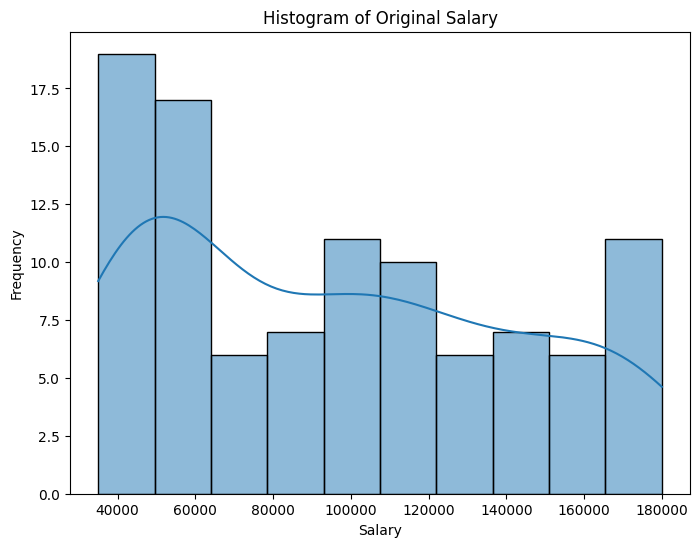

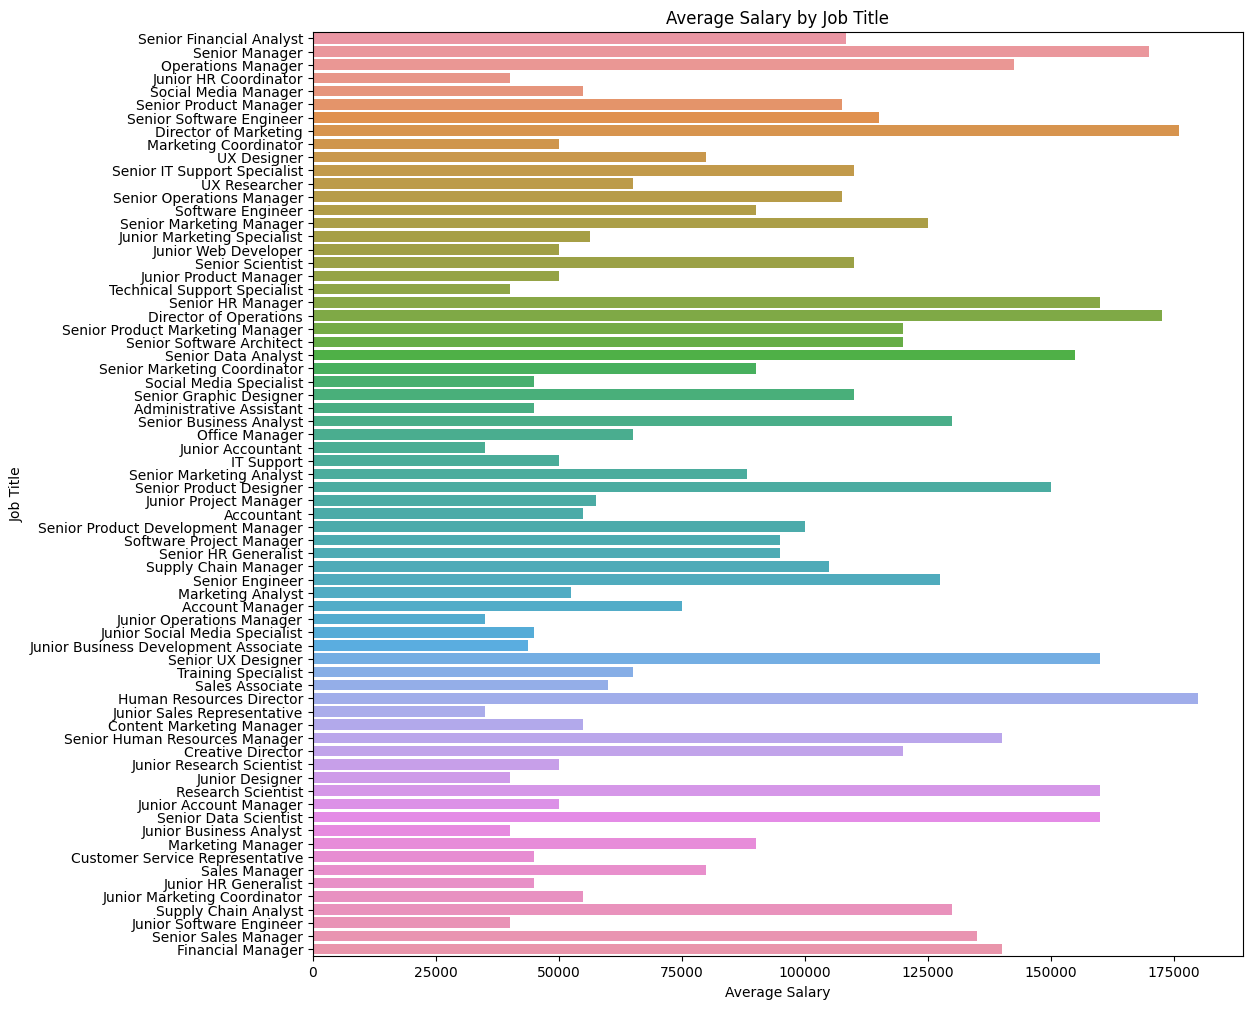

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = data_sample.describe()
print("Summary Statistics:")
print(summary_stats)

# Histogram of the original salary
plt.figure(figsize=(8, 6))
sns.histplot(data_sample['original_salary'], bins=10, kde=True)
plt.title("Histogram of Original Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

# Bar plot of average salary by job title
plt.figure(figsize=(12, 12))
sns.barplot(x='average_salary', y='Job Title', data=data_sample)
plt.title("Average Salary by Job Title")
plt.xlabel("Average Salary")
plt.ylabel("Job Title")
plt.show()


# **Linear Regression**

###Linear regression can be useful in our case for several reasons:

1. Interpretable relationship: Linear regression assumes a linear relationship between the input features and the target variable (salary). This makes the model interpretable, as the coefficients of the linear regression equation provide insights into the relationship between the features and the salary. We can easily interpret the impact of each feature on the predicted salary.

2. Feature correlation: Linear regression allows us to assess the correlation between the input features and the target variable. By examining the coefficients of the linear regression model, we can determine the direction and magnitude of the relationship between each feature and the predicted salary. Positive coefficients indicate a positive correlation, meaning an increase in the feature value leads to an increase in salary, while negative coefficients indicate a negative correlation.

3. Assumptions: Linear regression has certain assumptions, such as linearity, independence of errors, homoscedasticity (constant variance of errors), and absence of multicollinearity. By examining these assumptions, we can gain insights into the suitability of the linear regression model for our data. If the assumptions are violated, we may need to consider other regression models.

4. Baseline model: Linear regression can serve as a baseline model for comparison with more complex models. It provides a simple and straightforward approach to predict salary based on the given features. We can use it as a starting point and then explore more sophisticated models if needed.

However, it's important to note that linear regression assumes a linear relationship between the features and the target variable. If the relationship is non-linear or more complex, other regression models mentioned earlier (e.g., decision tree regression, random forest regression, gradient boosting regression) may be more appropriate. It's recommended to experiment with different models and evaluate their performance to choose the one that best fits our data and provides accurate salary predictions.

Linear Regression Results:
Mean Squared Error (MSE): 202385179.15
Coefficient of Determination (R^2): 0.90
Training Time: 0.00 seconds
Memory Consumption: 237.82 MB

Sample Row's Actual Output: 95000.00
Sample Row's Predicted Output: 79239.57


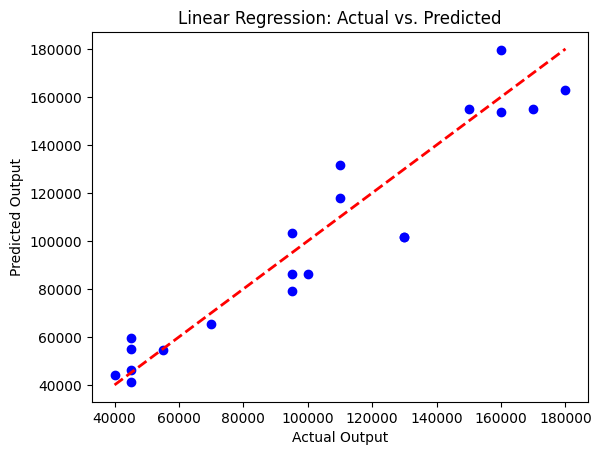

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import time
import psutil
import matplotlib.pyplot as plt

# Select the features and target variable
features = ['Years of Experience', 'Age', 'Education Level']
target = 'original_salary'

X = data_sample[features]
y = data_sample[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Measure training time and memory consumption
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

process = psutil.Process()
memory_usage = process.memory_info().rss / 1024 ** 2

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Linear Regression Results:")
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Coefficient of Determination (R^2): {:.2f}".format(r2))
print("Training Time: {:.2f} seconds".format(training_time))
print("Memory Consumption: {:.2f} MB".format(memory_usage))

# Display a sample row's actual output and predicted output
sample_index = X_test.index[0]
sample_actual_output = y_test.loc[sample_index]
sample_predicted_output = y_pred[0]
print("\nSample Row's Actual Output: {:.2f}".format(sample_actual_output))
print("Sample Row's Predicted Output: {:.2f}".format(sample_predicted_output))

# Visualize the results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()


# **Random Forest**

###Random Forest can be a useful model to apply in our case for the following reasons:

1. Non-linear relationships: Random Forest is capable of capturing non-linear relationships between the input features and the target variable (salary). This is particularly beneficial when the relationship between the features and salary is not strictly linear. The ensemble of decision trees in Random Forest can capture complex interactions and patterns in the data, allowing for more accurate predictions.

2. Feature importance: Random Forest provides a measure of feature importance, which helps identify the relative importance of each feature in predicting salary. By analyzing the feature importance scores, we can understand which features have the most significant impact on the prediction. This information can provide valuable insights for feature selection and further analysis.

3. Robust to outliers and noise: Random Forest is robust to outliers and noisy data. Since Random Forest uses an ensemble of decision trees, the impact of outliers on the overall prediction is minimized. Outliers in individual decision trees are less likely to have a substantial influence on the final prediction, reducing the risk of overfitting.

4. Handling categorical features: Random Forest can handle both numerical and categorical features without requiring explicit feature engineering, such as one-hot encoding. This can be advantageous if we have categorical features in our data, such as job titles or education levels. Random Forest automatically handles the encoding and considers the categorical variables in the decision-making process.

5. Overfitting prevention: Random Forest incorporates randomness by using random subsets of features and random samples of the data for each decision tree. This randomness helps prevent overfitting, improving the model's generalization ability. It reduces the risk of the model memorizing the training data and enables better performance on unseen data.

6. Model evaluation: Random Forest provides built-in methods to assess model performance, such as out-of-bag (OOB) error estimation and cross-validation. These techniques help estimate the model's performance without the need for separate validation sets and enable better understanding of how well the model generalizes to unseen data.

Overall, Random Forest is a powerful and flexible model that can handle complex relationships, capture feature importance, and provide robust predictions. It is well-suited for situations where the relationship between features and salary is non-linear or involves interactions between variables. However, it's always recommended to experiment with different models and evaluate their performance on our specific dataset to choose the best model for our prediction task.

Random Forest Regression Results:
Mean Squared Error (MSE): 378090955.30
Coefficient of Determination (R^2): 0.82
Training Time: 0.13 seconds
Memory Consumption: 246.44 MB

Sample Row's Actual Output: 95000.00
Sample Row's Predicted Output: 93049.17


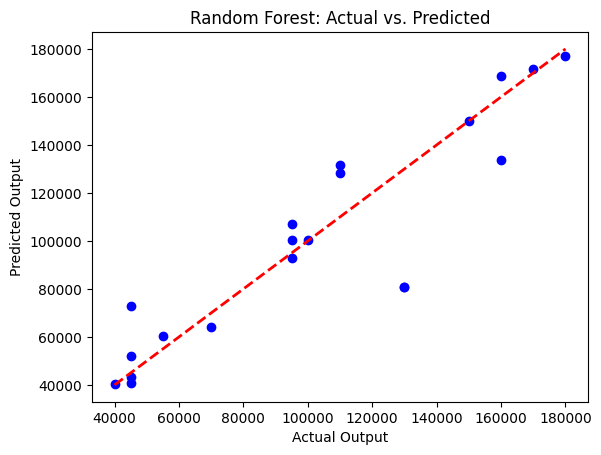

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import time
import psutil
import matplotlib.pyplot as plt

# Select the features and target variable
features = ['Years of Experience', 'Age', 'Education Level']
target = 'original_salary'

X = data_sample[features]
y = data_sample[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor
model = RandomForestRegressor(random_state=42)

# Measure training time and memory consumption
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

process = psutil.Process()
memory_usage = process.memory_info().rss / 1024 ** 2

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Random Forest Regression Results:")
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Coefficient of Determination (R^2): {:.2f}".format(r2))
print("Training Time: {:.2f} seconds".format(training_time))
print("Memory Consumption: {:.2f} MB".format(memory_usage))

# Display a sample row's actual output and predicted output
sample_index = X_test.index[0]
sample_actual_output = y_test.loc[sample_index]
sample_predicted_output = y_pred[0]
print("\nSample Row's Actual Output: {:.2f}".format(sample_actual_output))
print("Sample Row's Predicted Output: {:.2f}".format(sample_predicted_output))

# Plotting the results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Random Forest: Actual vs. Predicted')
plt.show()


#**Significance of Age, Years of Experience, and Education Level on the salary of an indivisual**

In [36]:
import statsmodels.api as sm

# Select the features and target variable
features = ['Age', 'Years of Experience', 'Education Level']
target = 'original_salary'

X = data_sample[features]
y = data_sample[target]

# Add a constant term to the features matrix
X = sm.add_constant(X)

# Create and fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        original_salary   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     287.6
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           7.90e-48
Time:                        22:46:25   Log-Likelihood:                -1101.0
No. Observations:                 100   AIC:                             2210.
Df Residuals:                      96   BIC:                             2220.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.595e+04   3

#**Example**

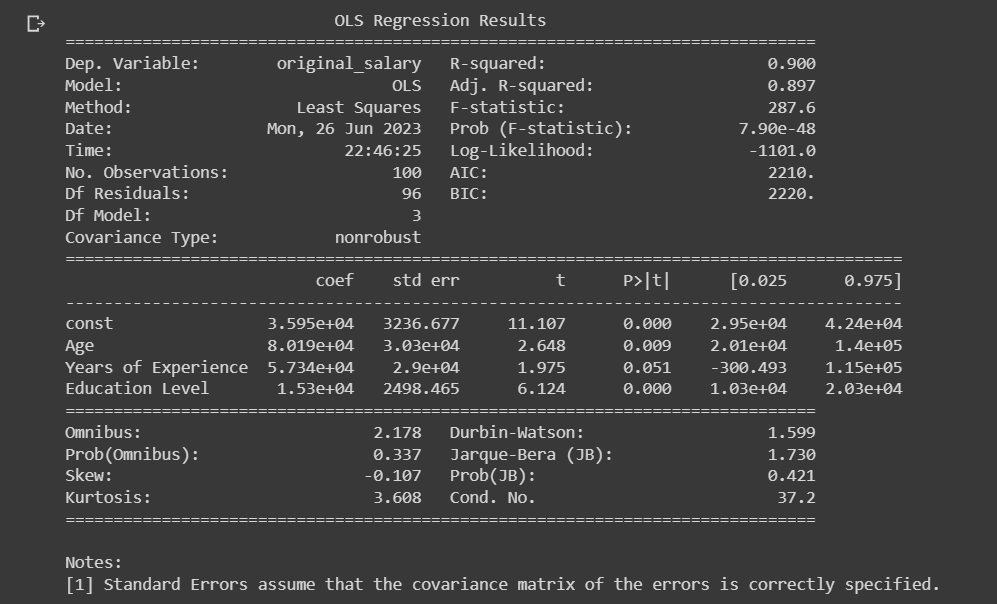

Coefficients: The coefficients represent the estimated effect of each independent variable on the dependent variable. They indicate the change in the dependent variable associated with a one-unit change in the independent variable, holding other variables constant.

The constant coefficient represents the estimated salary when all independent variables are zero. In this case, the constant coefficient is 3.595e+04.

The coefficient for Age is 8.019e+04, indicating that a one-year increase in Age is associated with an increase of approximately 80,190 in the original_salary, holding other variables constant.

The coefficient for Years of Experience is 5.734e+04, suggesting that a one-year increase in Years of Experience is associated with an increase of approximately 57,340 in the original_salary, though this result is not statistically significant at the conventional level (p-value = 0.051).

The coefficient for Education Level is 1.53e+04, indicating that a one-unit increase in Education Level is associated with an increase of approximately 15,300 in the original_salary.